In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
house_prices = pd.read_csv("train.csv")

In [19]:
house_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
house_prices.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
house_prices.drop("Id" , axis=1, inplace=True)

In [22]:
house_prices["MSSubClass"]= house_prices["MSSubClass"].map({20:	"1-STORY 1946 & NEWER ALL STYLES",
        30:	"1-STORY 1945 & OLDER",
        40:	"1-STORY W/FINISHED ATTIC ALL AGES",
        45:	"1-1/2 STORY - UNFINISHED ALL AGES",
        50:	"1-1/2 STORY FINISHED ALL AGES",
        60:	"2-STORY 1946 & NEWER",
        70:	"2-STORY 1945 & OLDER",
        75:	"2-1/2 STORY ALL AGES",
        80:	"SPLIT OR MULTI-LEVEL",
        85:	"SPLIT FOYER",
        90:	"DUPLEX - ALL STYLES AND AGES",
       120:	"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:	"1-1/2 STORY PUD - ALL AGES",
       160:	"2-STORY PUD - 1946 & NEWER",
       180:	"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:	"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

In [23]:
non_num=house_prices.select_dtypes("object").columns

In [24]:
def genericna(x):
    if x is np.NaN:
        return "No (NaN)"
    else:
        return x

In [25]:
for feat in non_num:
    house_prices[feat]=house_prices[feat].apply(lambda x: genericna(x))

In [26]:
house_prices.isna().sum()[house_prices.isna().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [27]:
house_prices["GarageYrBlt"].nunique()

97

In [28]:
house_prices.corr()["SalePrice"]["GarageYrBlt"]

0.4863616774878596

In [29]:
house_prices.corr()["YearBuilt"]["GarageYrBlt"]

0.8256674841743408

In [30]:
house_prices.corr()["YearBuilt"]["SalePrice"]

0.5228973328794967

In [31]:
house_prices.drop("GarageYrBlt", axis=1 , inplace=True)

In [32]:
house_prices.drop(house_prices[house_prices["MasVnrArea"].isnull()].index , inplace=True)

In [33]:
def ExGdTAFaPo(x):
    if x=="Ex":
        return 5
    elif x=="Gd":
        return 4
    elif x=="TA":
        return 3
    elif x=="Fa":
        return 2
    elif x=="Po":
        return 1
    elif x=="No (NaN)":
        return 0
    else:
        NotImplementedError

In [34]:
listaExGdTAFaPo=[]
for feat in house_prices.columns:
    if all(x in "Ex Gd TA Fa Po".split()+["No (NaN)"] for x in house_prices[feat].unique()):
        listaExGdTAFaPo += [feat]

In [35]:
listaExGdTAFaPo

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC']

In [36]:
for x in listaExGdTAFaPo:
    house_prices[x] = house_prices[x].apply(lambda y : ExGdTAFaPo(y))
    

In [37]:
house_prices["KitchenQual"]

0       4
1       3
2       4
3       4
4       4
       ..
1455    3
1456    3
1457    4
1458    4
1459    3
Name: KitchenQual, Length: 1452, dtype: int64

In [38]:
def GdAvMnNo(x):
    
    if x=="Gd":
        return 4
    elif x=="Av":
        return 3
    elif x=="Mn":
        return 2
    elif x=="No":
        return 1
    elif x=="No (NaN)":
        return 0
    else:
        NotImplementedError

In [39]:
listaGdAvMnNo=[]
for feat in house_prices.columns:
    if all(x in "Gd Av Mn No".split()+["No (NaN)"] for x in house_prices[feat].unique()):
        listaGdAvMnNo += [feat]

In [40]:
listaGdAvMnNo

['BsmtExposure']

In [41]:
house_prices["BsmtExposure"]= house_prices["BsmtExposure"].apply(lambda x: GdAvMnNo(x))

In [42]:
def GLQALQBLQRecLwQUnf(x):
    
    if x=="GLQ":
        return 6
    elif x=="ALQ":
        return 5
    elif x=="BLQ":
        return 4
    elif x=="Rec":
        return 3
    elif x=="LwQ":
        return 2
    elif x=="Unf":
        return 1
    elif x=="No (NaN)":
        return 0
    else:
        NotImplementedError

In [43]:
listaGLQALQBLQRecLwQUnf=[]
for feat in house_prices.columns:
    if all(x in "GLQ ALQ BLQ Rec LwQ Unf".split()+["No (NaN)"] for x in house_prices[feat].unique()):
        listaGLQALQBLQRecLwQUnf += [feat]

In [44]:
listaGLQALQBLQRecLwQUnf

['BsmtFinType1', 'BsmtFinType2']

In [45]:
for x in listaGLQALQBLQRecLwQUnf:
    house_prices[x] = house_prices[x].apply(lambda y : GLQALQBLQRecLwQUnf(y))

In [46]:
house_prices["Functional"] = house_prices["Functional"].map({"Typ"	:7,
       "Min1"	:6,
       "Min2"	:5,
       "Mod"	:4,
       "Maj1"	:3,
       "Maj2"	:2,
       "Sev"	:1,
       "Sal"	:0})

In [47]:
house_prices["GarageFinish"]= house_prices["GarageFinish"].map({"Fin"	:3,
       "RFn"	:2	,
       "Unf"	:1,
       "No (NaN)"	:0})

In [48]:
house_prices.select_dtypes("object").columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
B=pd.get_dummies(house_prices[house_prices.select_dtypes("object").columns] ,drop_first=True)
B
A=house_prices.drop(house_prices.select_dtypes("object").columns , axis=1)

house_prices_with_dummies = pd.concat([A,B] , axis=1)

In [50]:
house_prices_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,5,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [51]:
house_prices_with_dummies.corr()["SalePrice"][house_prices_with_dummies.corr()["SalePrice"]>0.1]

LotFrontage              0.350279
LotArea                  0.264674
OverallQual              0.789997
YearBuilt                0.522896
YearRemodAdd             0.507158
                           ...   
GarageType_BuiltIn       0.237547
PavedDrive_Y             0.231965
Fence_No (NaN)           0.171221
SaleType_New             0.354904
SaleCondition_Partial    0.349383
Name: SalePrice, Length: 67, dtype: float64

In [52]:
house_prices_with_dummies.isnull().sum()[house_prices_with_dummies.isnull().sum()>0]

LotFrontage    257
dtype: int64

In [53]:
data_stimate_lotfrontage=house_prices_with_dummies.dropna(axis=0).drop(["SalePrice", "LotFrontage"], axis=1)

In [54]:
from sklearn.model_selection import train_test_split
X_train_LotFrontage_nopca, X_test_LotFrontage_nopca, y_train_nopca, y_test_nopca = train_test_split(data_stimate_lotfrontage, house_prices_with_dummies["LotFrontage"].dropna(axis=0), test_size=0.25)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler_LotFrontage_nopca = MinMaxScaler()
X_train_LotFrontage_nopca= scaler_LotFrontage_nopca.fit_transform(X_train_LotFrontage_nopca)
X_test_LotFrontage_nopca = scaler_LotFrontage_nopca.transform(X_test_LotFrontage_nopca)

In [57]:
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
lm_LotFrontage_nopca=LinearRegression()
ann_LotFrontage_nopca=Sequential()

ann_LotFrontage_nopca.add(Dense(221, activation='relu'))
ann_LotFrontage_nopca.add(Dropout(0.2))
ann_LotFrontage_nopca.add(Dense(10, activation='relu'))
ann_LotFrontage_nopca.add(Dropout(0.2))

ann_LotFrontage_nopca.add(Dense(units=1))

ann_LotFrontage_nopca.compile(loss='mse', optimizer='adam')

In [59]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
X_train_LotFrontage_nopca.shape

(896, 221)

In [60]:
lm_LotFrontage_nopca.fit(X_train_LotFrontage_nopca, y_train_nopca)
ann_LotFrontage_nopca.fit(x = X_train_LotFrontage_nopca ,y = y_train_nopca,epochs=10000,batch_size=64, validation_data=(X_test_LotFrontage_nopca, y_test_nopca), callbacks=[early_stop])

Epoch 1/10000
14/14 [==============================] - 2s 48ms/step - loss: 5221.6221 - val_loss: 5549.6548
Epoch 2/10000
14/14 [==============================] - 0s 9ms/step - loss: 4663.4697 - val_loss: 4765.2334
Epoch 3/10000
14/14 [==============================] - 0s 9ms/step - loss: 3718.7344 - val_loss: 3499.9312
Epoch 4/10000
14/14 [==============================] - 0s 12ms/step - loss: 2441.0759 - val_loss: 2003.7142
Epoch 5/10000
14/14 [==============================] - 0s 9ms/step - loss: 1259.6617 - val_loss: 970.5938
Epoch 6/10000
14/14 [==============================] - 0s 12ms/step - loss: 880.3038 - val_loss: 751.4936
Epoch 7/10000
14/14 [==============================] - 0s 9ms/step - loss: 852.2349 - val_loss: 745.7806
Epoch 8/10000
14/14 [==============================] - 0s 12ms/step - loss: 792.7885 - val_loss: 768.7167
Epoch 9/10000
14/14 [==============================] - 0s 9ms/step - loss: 783.2162 - val_loss: 754.6000
Epoch 10/10000
14/14 [====================

In [61]:
lmpred_nopca=lm_LotFrontage_nopca.predict(X_test_LotFrontage_nopca)
annpred_nopca=ann_LotFrontage_nopca.predict(X_test_LotFrontage_nopca)

10/10 [==============================] - 0s 4ms/step


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler_stimate_lotfrontage = StandardScaler()
scaler_stimate_lotfrontage.fit(data_stimate_lotfrontage)
scaled_data = scaler_stimate_lotfrontage.transform(data_stimate_lotfrontage)
pca = PCA(n_components=8)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca

array([[ 3.33611545e+00,  1.46803637e+00, -5.95419305e-01, ...,
        -1.02220287e+00, -1.60833213e+00,  2.79956485e-01],
       [-1.27298017e-01, -3.34015273e+00,  7.70125264e-01, ...,
         3.14016664e-02, -2.43719499e-01,  1.02966006e+00],
       [ 3.98723671e+00,  1.34275080e+00, -1.51362365e-01, ...,
        -1.07150221e+00, -1.93409614e+00,  7.16660553e-01],
       ...,
       [ 3.92865485e-01,  2.67297163e+00,  3.33114414e+00, ...,
         2.08825157e+00,  2.15647246e-03, -4.99337562e+00],
       [-2.40941789e+00, -4.29279297e+00, -2.43291788e-01, ...,
         1.15322541e-02,  3.14216750e-01,  5.24524985e-01],
       [-7.90396404e-01, -3.47185644e+00,  3.22705782e-01, ...,
         9.34293578e-02, -8.94963580e-01, -2.21417028e-01]])

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_pca, house_prices_with_dummies["LotFrontage"].dropna(axis=0), test_size=0.25)

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train= scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [65]:
lm=LinearRegression()
ann=Sequential()

ann.add(Dense(8, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(4, activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(units=1))

ann.compile(loss='mse', optimizer='adam')

In [66]:
data_stimate_lotfrontage.shape

(1195, 221)

In [67]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
X_train.shape

(896, 8)

In [68]:
lm.fit(X_train, y_train)
ann.fit(x = X_train ,y = y_train,epochs=10000,batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10000
14/14 [==============================] - 1s 27ms/step - loss: 5419.8828 - val_loss: 5511.0942
Epoch 2/10000
14/14 [==============================] - 0s 7ms/step - loss: 5404.9443 - val_loss: 5491.4014
Epoch 3/10000
14/14 [==============================] - 0s 7ms/step - loss: 5382.0322 - val_loss: 5471.8213
Epoch 4/10000
14/14 [==============================] - 0s 7ms/step - loss: 5369.2344 - val_loss: 5452.2876
Epoch 5/10000
14/14 [==============================] - 0s 6ms/step - loss: 5342.1841 - val_loss: 5430.9575
Epoch 6/10000
14/14 [==============================] - 0s 7ms/step - loss: 5323.0190 - val_loss: 5407.9614
Epoch 7/10000
14/14 [==============================] - 0s 7ms/step - loss: 5302.3198 - val_loss: 5382.7363
Epoch 8/10000
14/14 [==============================] - 0s 14ms/step - loss: 5271.2271 - val_loss: 5352.1646
Epoch 9/10000
14/14 [==============================] - 0s 7ms/step - loss: 5236.1123 - val_loss: 5314.8398
Epoch 10/10000
14/14 [=============

In [69]:
from sklearn import metrics
lmpred=lm.predict(X_test)
annpred=ann.predict(X_test)
print('LM NO PCA MAE:', metrics.mean_absolute_error(y_test_nopca, lmpred_nopca))
print('ANN NO PCA MAE:', metrics.mean_absolute_error(y_test_nopca, annpred_nopca))
print('LM MAE:', metrics.mean_absolute_error(y_test, lmpred))
print('ANN MAE:', metrics.mean_absolute_error(y_test, annpred))
print('LM NO PCA MSE:', metrics.mean_squared_error(y_test_nopca, lmpred_nopca))
print('ANN NO PCA MSE:', metrics.mean_squared_error(y_test_nopca, annpred_nopca))
print('LM MSE:', metrics.mean_squared_error(y_test, lmpred))
print('ANN MSE:', metrics.mean_squared_error(y_test, annpred))
print('LM NO PCA RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nopca, lmpred_nopca)))
print('ANN NO PCA RMSE:', np.sqrt(metrics.mean_squared_error(y_test_nopca, annpred_nopca)))
print('LM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lmpred)))
print('ANN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, annpred)))

10/10 [==============================] - 0s 3ms/step
LM NO PCA MAE: 271129690827.30875
ANN NO PCA MAE: 10.7758493774312
LM MAE: 12.645183266014625
ANN MAE: 13.21816986619828
LM NO PCA MSE: 5.298666241211767e+24
ANN NO PCA MSE: 409.8670191216612
LM MSE: 446.6836765000124
ANN MSE: 484.13450491096484
LM NO PCA RMSE: 2301883194519.602
ANN NO PCA RMSE: 20.2451727362762
LM RMSE: 21.134892393859317
ANN RMSE: 22.003056717441893


In [70]:
RMSE=[]
for i in range(2,200):
    scaler_stimate_lotfrontage = StandardScaler()
    scaler_stimate_lotfrontage.fit(data_stimate_lotfrontage)
    scaled_data = scaler_stimate_lotfrontage.transform(data_stimate_lotfrontage)
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    X_train, X_test, y_train, y_test = train_test_split(x_pca, house_prices_with_dummies["LotFrontage"].dropna(axis=0), test_size=0.25)

    scaler1 = MinMaxScaler()
    X_train= scaler1.fit_transform(X_train)
    X_test = scaler1.transform(X_test)
    
    lm.fit(X_train, y_train)
    pred=lm.predict(X_test)

    RMSE += [np.sqrt(metrics.mean_squared_error(y_test, pred))]

In [71]:
RMSE=pd.Series(data=RMSE)

In [72]:
RMSE.min()

15.26854928408479

In [73]:
RMSE.idxmin()

64

In [74]:
lm43 = LinearRegression()

In [75]:

scaler_stimate_lotfrontage = StandardScaler()
scaler_stimate_lotfrontage.fit(data_stimate_lotfrontage)
scaled_data = scaler_stimate_lotfrontage.transform(data_stimate_lotfrontage)

pca_43 = PCA(n_components=43)
pca_43.fit(scaled_data)
x_pca = pca_43.transform(scaled_data)

scaler43 = MinMaxScaler()
X_train= scaler43.fit_transform(x_pca)
y_train= house_prices_with_dummies["LotFrontage"].dropna(axis=0)
lm43.fit(X_train,y_train)


LinearRegression()

In [76]:
data_stimate_lotfrontage.shape

(1195, 221)

In [81]:
def lotfrontNA(data):
    if data["LotFrontage"]>10 and data["LotFrontage"]< 1320:
        return data["LotFrontage"]
        
    else:
        
        reindexed= data.reindex(index=house_prices_with_dummies.index  )
        scaled = scaler_LotFrontage_nopca.transform(pd.DataFrame(columns=data_stimate_lotfrontage.columns , data=np.array(data.drop(["LotFrontage" , "SalePrice"])).reshape(1,221)))
  

        return ann_LotFrontage_nopca.predict((scaled.reshape(1,221)))[0]

In [179]:

new=(house_prices_with_dummies.loc[4]).copy()

new["LotFrontage"]=1
lotfrontNA(new)

1/1 [==============================] - 0s 32ms/step


array([80.22345], dtype=float32)

In [82]:
for i in house_prices_with_dummies.index:

    house_prices_with_dummies.loc[i, "LotFrontage"]=lotfrontNA((house_prices_with_dummies.loc[i]))

1/1 [==============================] - 0s 40ms/step


In [83]:
house_prices_with_dummies.isnull().sum()[house_prices_with_dummies.isnull().sum()>0]

Series([], dtype: int64)

In [84]:
clean_data = house_prices_with_dummies
X=clean_data.drop("SalePrice" , axis=1)
y= clean_data["SalePrice"]

In [85]:
clean_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,3,3,3,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,4,3,4,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,3,3,4,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,5,4,3,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,3,3,3,...,0,0,0,0,1,0,0,0,1,0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [87]:
lm_final_nopca=LinearRegression()
ann_final_nopca=Sequential()

ann_final_nopca.add(Dense(222, activation='relu'))
ann_final_nopca.add(Dropout(0.2))
ann_final_nopca.add(Dense(15, activation='relu'))
ann_final_nopca.add(Dropout(0.2))

ann_final_nopca.add(Dense(units=1))

ann_final_nopca.compile(loss='mse', optimizer='adam')

In [88]:
scaler_final_nopca = MinMaxScaler()
X_train_LotFrontage_nopca= scaler_final_nopca.fit_transform(X_train)
X_test_LotFrontage_nopca = scaler_final_nopca.transform(X_test)

In [89]:
lm_final_nopca.fit(X_train, y_train)
ann_final_nopca.fit(x = X_train_LotFrontage_nopca ,y = y_train,epochs=10000,batch_size=64, validation_data=(X_test_LotFrontage_nopca, y_test), callbacks=[early_stop])

Epoch 1/10000
18/18 [==============================] - 2s 23ms/step - loss: 39266103296.0000 - val_loss: 37811097600.0000
Epoch 2/10000
18/18 [==============================] - 0s 8ms/step - loss: 39262486528.0000 - val_loss: 37805727744.0000
Epoch 3/10000
18/18 [==============================] - 0s 8ms/step - loss: 39254364160.0000 - val_loss: 37793878016.0000
Epoch 4/10000
18/18 [==============================] - 0s 10ms/step - loss: 39238217728.0000 - val_loss: 37772054528.0000
Epoch 5/10000
18/18 [==============================] - 0s 12ms/step - loss: 39211032576.0000 - val_loss: 37736775680.0000
Epoch 6/10000
18/18 [==============================] - 0s 11ms/step - loss: 39167680512.0000 - val_loss: 37685075968.0000
Epoch 7/10000
18/18 [==============================] - 0s 11ms/step - loss: 39104495616.0000 - val_loss: 37612212224.0000
Epoch 8/10000
18/18 [==============================] - 0s 12ms/step - loss: 39016824832.0000 - val_loss: 37512515584.0000
Epoch 9/10000
18/18 [=====

In [90]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
RMSE=[]
for i in range(2,100):
    scaler_final = StandardScaler()
    scaler_final.fit(X_train_pca)
    scaled_data = scaler_final.transform(clean_data.drop(["SalePrice"] , axis=1))
    pca = PCA(n_components=i)
    pca.fit(scaled_data)
    x_pca = pca.transform(scaled_data)

    X_train, X_test, y_train, y_test = train_test_split(x_pca, clean_data["SalePrice"], test_size=0.25)

    scaler1 = MinMaxScaler()
    X_train= scaler1.fit_transform(X_train)
    X_test = scaler1.transform(X_test)
    
    lm.fit(X_train, y_train)
    pred=lm.predict(X_test)

    RMSE += [np.sqrt(metrics.mean_squared_error(y_test, pred))]

<AxesSubplot:>

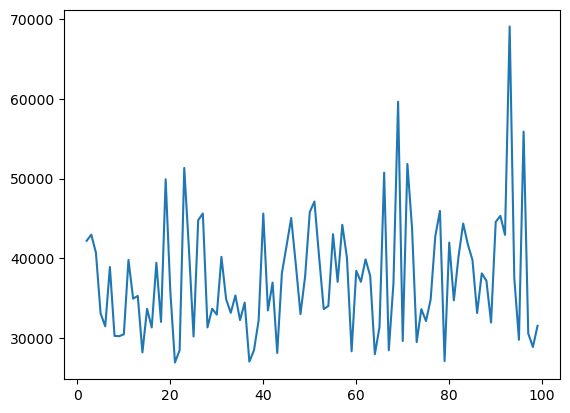

In [92]:
sns.lineplot(x=range(2,100) , y=RMSE)

In [93]:
min(RMSE)

26919.217740115066

In [94]:
pd.Series(RMSE).idxmin()

19

In [183]:
final_data= pd.read_csv("test.csv")

In [184]:
final_data.index=final_data["Id"]
final_data.drop("Id" , axis=1, inplace=True)

final_data["MSSubClass"]= final_data["MSSubClass"].map({20:	"1-STORY 1946 & NEWER ALL STYLES",
        30:	"1-STORY 1945 & OLDER",
        40:	"1-STORY W/FINISHED ATTIC ALL AGES",
        45:	"1-1/2 STORY - UNFINISHED ALL AGES",
        50:	"1-1/2 STORY FINISHED ALL AGES",
        60:	"2-STORY 1946 & NEWER",
        70:	"2-STORY 1945 & OLDER",
        75:	"2-1/2 STORY ALL AGES",
        80:	"SPLIT OR MULTI-LEVEL",
        85:	"SPLIT FOYER",
        90:	"DUPLEX - ALL STYLES AND AGES",
       120:	"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:	"1-1/2 STORY PUD - ALL AGES",
       160:	"2-STORY PUD - 1946 & NEWER",
       180:	"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:	"2 FAMILY CONVERSION - ALL STYLES AND AGES"})

for feat in non_num:
    final_data[feat]=final_data[feat].apply(lambda x: genericna(x))

final_data.drop("GarageYrBlt", axis=1 , inplace=True)

final_data.loc[final_data[final_data["MasVnrArea"].isnull()].index]["MasVnrArea"] = final_data.loc[final_data[final_data["MasVnrArea"].isnull()].index]["MasVnrArea"].map({np.nan : house_prices["MasVnrArea"].mean()})

for x in listaExGdTAFaPo:
    final_data[x] = final_data[x].apply(lambda y : ExGdTAFaPo(y))

final_data["BsmtExposure"]= final_data["BsmtExposure"].apply(lambda x: GdAvMnNo(x))

for x in listaGLQALQBLQRecLwQUnf:
    final_data[x] = final_data[x].apply(lambda y : GLQALQBLQRecLwQUnf(y))

final_data["GarageFinish"]= final_data["GarageFinish"].map({"Fin"	:3,
       "RFn"	:2	,
       "Unf"	:1,
       "No (NaN)"	:0})

       


In [185]:
final_data.isnull().sum()[final_data.isnull().sum()>0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
GarageArea        1
dtype: int64

In [186]:
def genericna0(x):
    if  type(x) == str or x >0 or x<100000000000000 :
        return x
    else:
        return 0

In [187]:
for i in list(final_data.columns.drop("LotFrontage")):
    final_data[i]=final_data[i].apply(lambda x : genericna0(x))

In [188]:
final_data.isnull().sum()[final_data.isnull().sum()>0]

LotFrontage    227
dtype: int64

In [189]:
final_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,1-STORY 1946 & NEWER ALL STYLES,RH,80.0,11622,Pave,No (NaN),Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,3,468.0,2,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1,1.0,730.0,3,3,Y,140,0,0,0,120,0,0,MnPrv,No (NaN),0,6,2010,WD,Normal
1462,1-STORY 1946 & NEWER ALL STYLES,RL,81.0,14267,Pave,No (NaN),IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,1,5,923.0,1,0.0,406.0,1329.0,GasA,3,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,Typ,0,0,Attchd,1,1.0,312.0,3,3,Y,393,36,0,0,0,0,0,No (NaN),Gar2,12500,6,2010,WD,Normal
1463,2-STORY 1946 & NEWER,RL,74.0,13830,Pave,No (NaN),IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,6,791.0,1,0.0,137.0,928.0,GasA,4,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,Typ,1,3,Attchd,3,2.0,482.0,3,3,Y,212,34,0,0,0,0,0,MnPrv,No (NaN),0,3,2010,WD,Normal
1464,2-STORY 1946 & NEWER,RL,78.0,9978,Pave,No (NaN),IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,3,3,PConc,3,3,1,6,602.0,1,0.0,324.0,926.0,GasA,5,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,4,7,Typ,1,4,Attchd,3,2.0,470.0,3,3,Y,360,36,0,0,0,0,0,No (NaN),No (NaN),0,6,2010,WD,Normal
1465,1-STORY PUD (Planned Unit Development) - 1946 ...,RL,43.0,5005,Pave,No (NaN),IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,4,3,PConc,4,3,1,5,263.0,1,0.0,1017.0,1280.0,GasA,5,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,4,5,Typ,0,0,Attchd,2,2.0,506.0,3,3,Y,0,82,0,0,144,0,0,No (NaN),No (NaN),0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,2-STORY PUD - 1946 & NEWER,RM,21.0,1936,Pave,No (NaN),Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,1,0.0,1,0.0,546.0,546.0,GasA,4,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,5,Typ,0,0,No (NaN),0,0.0,0.0,0,0,Y,0,0,0,0,0,0,0,No (NaN),No (NaN),0,6,2006,WD,Normal
2916,2-STORY PUD - 1946 & NEWER,RM,21.0,1894,Pave,No (NaN),Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,3,3,CBlock,3,3,1,3,252.0,1,0.0,294.0,546.0,GasA,3,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,3,6,Typ,0,0,CarPort,1,1.0,286.0,3,3,Y,0,24,0,0,0,0,0,No (NaN),No (NaN),0,4,2006,WD,Abnorml
2917,1-STORY 1946 & NEWER ALL STYLES,RL,160.0,20000,Pave,No (NaN),Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,1,5,1224.0,1,0.0,0.0,1224.0,GasA,5,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,3,7,Typ,1,3,Detchd,1,2.0,576.0,3,3,Y,474,0,0,0,0,0,0,

In [190]:
B=pd.get_dummies(final_data[final_data.select_dtypes("object").columns] ,drop_first=True)
B
A=final_data.drop(final_data.select_dtypes("object").columns , axis=1)

final_data_with_dummies = pd.concat([A,B] , axis=1)

In [191]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_No (NaN),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_No (NaN),LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_No (NaN),Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_No (NaN),Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No (NaN),MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_No (NaN),Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_No (NaN),SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [192]:
toadd=list(set(data_stimate_lotfrontage.columns)-set(final_data_with_dummies.columns))+["SalePrice"]

In [193]:
toremove=list(set(final_data_with_dummies.columns)-set(data_stimate_lotfrontage.columns)-set(["LotFrontage"]))

In [194]:
final_data_with_dummies.shape

(1459, 218)

In [195]:
final_data_with_dummies.drop(toremove , axis=1, inplace=True)

In [196]:
dftoadd=pd.DataFrame(columns=toadd , data=np.zeros((len(final_data_with_dummies) , len(toadd))) , index=final_data_with_dummies.index)

In [197]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,1,3,468.0,2,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1,1.0,730.0,3,3,140,0,0,0,120,0,0,0,6,2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [198]:
final_data_with_dummies =  pd.concat([final_data_with_dummies,dftoadd] , axis=1 )

In [199]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Electrical_No (NaN),RoofMatl_Metal,Heating_GasA,Condition2_RRAe,Heating_OthW,MiscFeature_TenC,Utilities_NoSeWa,Condition2_RRAn,Exterior1st_Stone,HouseStyle_2.5Fin,Functional,Electrical_Mix,RoofMatl_CompShg,Exterior1st_ImStucc,Condition2_RRNn,RoofMatl_Roll,RoofMatl_Membran,Exterior2nd_Other,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [200]:
final_data_with_dummies.shape

(1459, 223)

In [201]:


#print(final_data_with_dummies.shape)
#
#
#scaled_data = scaler_stimate_lotfrontage.transform(final_data_with_dummies.drop("LotFrontage" , axis=1))
#
#
#x_pca = pca_43.transform(scaled_data)
#
#scaler43 = MinMaxScaler()
#scaled_final= scaler43.fit_transform(x_pca)





for i in final_data_with_dummies.index:

    final_data_with_dummies.loc[i, "LotFrontage"]=lotfrontNA((final_data_with_dummies.loc[i]))

1/1 [==============================] - 0s 40ms/step


In [202]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Electrical_No (NaN),RoofMatl_Metal,Heating_GasA,Condition2_RRAe,Heating_OthW,MiscFeature_TenC,Utilities_NoSeWa,Condition2_RRAn,Exterior1st_Stone,HouseStyle_2.5Fin,Functional,Electrical_Mix,RoofMatl_CompShg,Exterior1st_ImStucc,Condition2_RRNn,RoofMatl_Roll,RoofMatl_Membran,Exterior2nd_Other,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [203]:
final_data_with_dummies= final_data_with_dummies.reindex(index=final_data_with_dummies.index ,columns=clean_data.drop("SalePrice" , axis=1).columns )

In [204]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No (NaN),Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [206]:
scaled_final=scaler_final_nopca.transform(final_data_with_dummies)

In [207]:
scaled_final

array([[0.20768902, 0.04824604, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.2110895 , 0.06060904, 0.55555556, ..., 0.        , 1.        ,
        0.        ],
       [0.18728616, 0.05856645, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.47972713, 0.08740564, 0.44444444, ..., 0.        , 0.        ,
        0.        ],
       [0.14648045, 0.04272593, 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.18728616, 0.03892122, 0.66666667, ..., 0.        , 1.        ,
        0.        ]])

In [208]:
final_data_with_dummies= pd.DataFrame(index=final_data_with_dummies.index , columns=final_data_with_dummies.columns  , data=scaled_final)

In [209]:
final_pred=ann_final_nopca.predict(final_data_with_dummies)

46/46 [==============================] - 0s 2ms/step


In [210]:
final_pred

array([[ 91356.83],
       [157146.48],
       [182259.75],
       ...,
       [155432.4 ],
       [103966.96],
       [216507.95]], dtype=float32)

In [211]:
df_solucion = pd.DataFrame(columns=["SalePrice"] , data=final_pred , index=final_data_with_dummies.index)

In [212]:
house_prices["SalePrice"].describe()

count      1452.000000
mean     180615.063361
std       79285.541485
min       34900.000000
25%      129900.000000
50%      162700.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [213]:
df_solucion.describe()

,SalePrice
count,1459.000000
mean,171138.562500
std,70842.804688
min,27421.957031
25%,118489.390625
50%,156905.562500
75%,210193.757812
max,575638.125000


In [214]:
df_solucion

,SalePrice
Id,
1461,91356.828125
1462,157146.484375
1463,182259.750000
1464,202498.812500
1465,186674.531250
...,...
2915,57631.886719
2916,56692.722656
2917,155432.406250


In [215]:
df_solucion.to_csv("Solucion.csv")

In [216]:
df_solucion[df_solucion["SalePrice"]>500000]

,SalePrice
Id,
1923,575638.125


In [217]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 20)

In [218]:
final_data_with_dummies[df_solucion["SalePrice"]>500000]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No (NaN),Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [219]:
final_data_with_dummies

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No (NaN),Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No (NaN),Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No (NaN),PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No (NaN),MiscFeature_No (NaN),MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,